In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import time
from scipy.stats import linregress
import pprint as pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)#change to 1500
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)#change to 1500
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


607

In [3]:

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
query_url = url + "appid=" + weather_api_key + "&units=" + unit + "&q="

# set up lists to hold reponse info
lat = []
lon =[]
temp_max = []
hum =[]
cloud=[]
wind =[]
country =[]
city_name =[]
city_num=[]
count=0
date =[]

# #add header to csv file
# with open(output_data_file, 'w') as csv_file:    
#     csv_file.write(f'City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp_max.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        city_name.append(response['name'])
        city_num.append(response['id'])
        date.append(response['dt'])
        print(f"The city is {city_name[count]},count is {count} number is {city_num[count]} the country is: {country[count]}")
        count = count + 1
    except:
        print(f'Skipping {city} ')
        
#     print(f"The latitude information received is: {lat}")
#     print(f"The longitude information received is: {lon}")
#     print(f"The high temperature information received is: {temp_max}")
#     print(f"The humidity information received is: {hum}")
#     print(f"The cloud percent information received is: {cloud}")
#     print(f"The wind speed information received is: {wind}")
 

The city is Jamestown,count is 0 number is 5122534 the country is: US
The city is Vaini,count is 1 number is 4032243 the country is: TO
The city is Albany,count is 2 number is 5106841 the country is: US
The city is Rikitea,count is 3 number is 4030556 the country is: PF
The city is Vikravāndi,count is 4 number is 1253177 the country is: IN
The city is Tuktoyaktuk,count is 5 number is 6170031 the country is: CA
The city is Pevek,count is 6 number is 2122090 the country is: RU
Skipping taolanaro 
The city is Vega de Alatorre,count is 7 number is 3514843 the country is: MX
The city is Chicama,count is 8 number is 3698359 the country is: PE
The city is Busselton,count is 9 number is 2075265 the country is: AU
The city is Mataura,count is 10 number is 6201424 the country is: NZ
The city is Yamethin,count is 11 number is 1285899 the country is: MM
The city is Bluff,count is 12 number is 2206939 the country is: NZ
The city is Torbay,count is 13 number is 6167817 the country is: CA
The city is

The city is Matara,count is 115 number is 1235846 the country is: LK
Skipping fort saint john 
The city is Aranos,count is 116 number is 3358666 the country is: NA
The city is East London,count is 117 number is 1006984 the country is: ZA
The city is Saint-Joseph,count is 118 number is 6690296 the country is: RE
The city is Cape Town,count is 119 number is 3369157 the country is: ZA
The city is Dublin,count is 120 number is 5344157 the country is: US
Skipping umzimvubu 
The city is Marmari,count is 121 number is 257643 the country is: GR
The city is Margate,count is 122 number is 2643044 the country is: GB
The city is Husavik,count is 123 number is 2629833 the country is: IS
The city is Pisco,count is 124 number is 3932145 the country is: PE
The city is Mogadishu,count is 125 number is 53654 the country is: SO
The city is Ol'ga,count is 126 number is 2018553 the country is: RU
The city is Almeirim,count is 127 number is 3407903 the country is: BR
The city is Namatanai,count is 128 numbe

The city is Gravdal,count is 229 number is 3155152 the country is: NO
The city is Talavera de la Reina,count is 230 number is 2510693 the country is: ES
Skipping kazalinsk 
The city is Pacific Grove,count is 231 number is 5380437 the country is: US
The city is Gillette,count is 232 number is 5826027 the country is: US
The city is Salalah,count is 233 number is 286621 the country is: OM
The city is Eunice,count is 234 number is 4323900 the country is: US
The city is Minot,count is 235 number is 5690532 the country is: US
The city is Batagay-Alyta,count is 236 number is 2027042 the country is: RU
The city is Corinth,count is 237 number is 259289 the country is: GR
The city is Pangnirtung,count is 238 number is 6096551 the country is: CA
The city is Lakselv,count is 239 number is 779082 the country is: NO
The city is Beisfjord,count is 240 number is 3144987 the country is: NO
The city is Yashan,count is 241 number is 1786867 the country is: CN
The city is Taoudenni,count is 242 number is 

The city is Gafanha da Encarnação,count is 345 number is 2739153 the country is: PT
The city is Morón,count is 346 number is 3430545 the country is: AR
The city is Laiyang,count is 347 number is 1804586 the country is: CN
The city is Yar-Sale,count is 348 number is 1486321 the country is: RU
The city is Nachalovo,count is 349 number is 523734 the country is: RU
The city is Saint-Leu,count is 350 number is 6690297 the country is: RE
The city is Kralendijk,count is 351 number is 3513563 the country is: BQ
The city is Richards Bay,count is 352 number is 962367 the country is: ZA
The city is Freeport,count is 353 number is 5117949 the country is: US
The city is Skopje,count is 354 number is 785842 the country is: MK
The city is Atikokan,count is 355 number is 5888001 the country is: CA
The city is Rørvik,count is 356 number is 3141310 the country is: NO
The city is Baykit,count is 357 number is 1510689 the country is: RU
The city is São José da Coroa Grande,count is 358 number is 3388456 t

The city is Srednekolymsk,count is 458 number is 2121025 the country is: RU
The city is Belaya Gora,count is 459 number is 2126785 the country is: RU
The city is Virginia Beach,count is 460 number is 4791259 the country is: US
Skipping dien bien 
The city is Sept-Îles,count is 461 number is 6144312 the country is: CA
The city is Mahajanga,count is 462 number is 1062663 the country is: MG
Skipping gazni 
The city is Ouésso,count is 463 number is 2255564 the country is: CG
The city is Narrabri,count is 464 number is 2155742 the country is: AU
Skipping tabiauea 
The city is Vinh Yen,count is 465 number is 1562548 the country is: VN
The city is Rolante,count is 466 number is 3450963 the country is: BR
The city is Riachão das Neves,count is 467 number is 3451478 the country is: BR
The city is Sulangan,count is 468 number is 1685422 the country is: PH
The city is Pyaozerskiy,count is 469 number is 503581 the country is: RU
The city is Esna,count is 470 number is 355449 the country is: EG
The

In [4]:
# City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed

city_data_dict = {
    "City":city_name,
    "Cloudiness":cloud,
    "Country":country,
    "Date":date,
    "Humidity":hum,
    "Lat":lat,
    "Lng":lon,
    "Max Temp":temp_max,
    "Wind Speed":wind
}
city_data_df = pd.DataFrame(city_data_dict)
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,90,US,1603077635,62,42.10,-79.24,55.00,10.29
1,Vaini,75,TO,1603077853,78,-21.20,-175.20,73.40,10.29
2,Albany,88,US,1603077819,64,42.60,-73.97,54.00,7.38
3,Rikitea,100,PF,1603077853,81,-23.12,-134.97,74.70,18.66
4,Vikravāndi,100,IN,1603077853,73,12.03,79.55,81.55,7.11


In [5]:
city_data_df.to_csv("../output_data/cities.csv")
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,90,US,1603077635,62,42.10,-79.24,55.00,10.29
1,Vaini,75,TO,1603077853,78,-21.20,-175.20,73.40,10.29
2,Albany,88,US,1603077819,64,42.60,-73.97,54.00,7.38
3,Rikitea,100,PF,1603077853,81,-23.12,-134.97,74.70,18.66
4,Vikravāndi,100,IN,1603077853,73,12.03,79.55,81.55,7.11


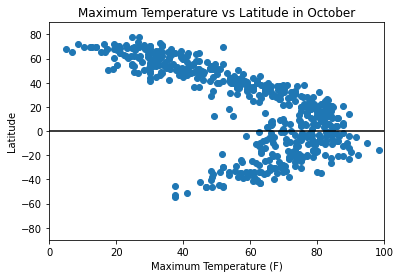

In [6]:
#Set up scatter plot for Temperature (F) vs. Latitude
plt.scatter(city_data_df['Max Temp'],city_data_df['Lat'])
plt.ylabel('Latitude')
plt.hlines(0,0,100)
plt.xlabel('Maximum Temperature (F)')
plt.xlim(0,100)
plt.ylim(-90,90)
plt.title('Maximum Temperature vs Latitude in October')
plt.savefig('Maximum Temperature vs Latitude in October')
#Maximum daily temperature in October is higher near the equator, as one would suspect!

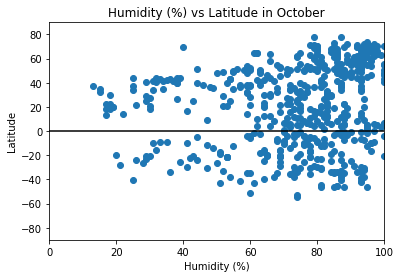

In [7]:
#Set up scatter plot for Humidity (%) vs. Latitude
plt.scatter(city_data_df['Humidity'],city_data_df['Lat'])
plt.ylabel('Latitude')
plt.hlines(0,0,100)
plt.xlabel('Humidity (%)')
plt.xlim(0,100)
plt.ylim(-90,90)
plt.title('Humidity (%) vs Latitude in October')
plt.savefig('Humidity (%) vs Latitude in October')
# Humidity in October apears to have a small positive correlation with latitude in the northern hemispere

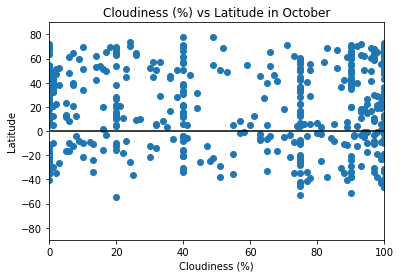

In [8]:
#Set up scatter plot for Cloudiness (%) vs. Latitude
plt.scatter(city_data_df['Cloudiness'],city_data_df['Lat'])
plt.ylabel('Latitude')
plt.hlines(0,0,100)
plt.xlabel('Cloudiness (%)')
plt.xlim(0,100)
plt.ylim(-90,90)
plt.title('Cloudiness (%) vs Latitude in October')
plt.savefig('Cloudiness (%) vs Latitude in October')

# CLoudiness in October seems to be unrelated to latitude since the scatter plot shows a random pattern

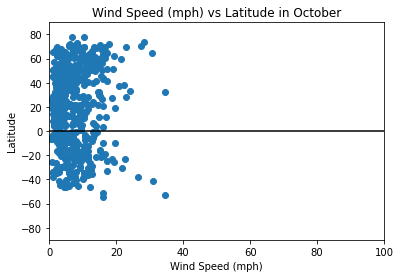

In [9]:
#Set up scatter plot for Wind Speed (mph) vs. Latitude
plt.scatter(city_data_df['Wind Speed'],city_data_df['Lat'])
plt.ylabel('Latitude')
plt.hlines(0,0,100)
plt.xlabel('Wind Speed (mph)')
plt.xlim(0,100)
plt.ylim(-90,90)
plt.title('Wind Speed (mph) vs Latitude in October')
plt.savefig('Wind Speed (mph) vs Latitude in October')

# As you can see wind speed in October is calm thoughout all latitudes 